In [228]:
#Load Libraries 

import yfinance as yf
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [214]:
#List of crypto as tickers
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD']

In [215]:
#Importing data using yahoo finance and creating Dataframe
data = yf.download(cryptocurrencies, start='2021-01-01', end='2022-09-26')
df = pd.DataFrame(data)


#Changing column names
df.rename(columns= {'BNB-USD':'BNB', 'BTC-USD':'Bitcoin', 'ETH-USD':'Ethereum', 'XRP-USD':'XRP'}, inplace = True)


df = df.stack().reset_index()
df.columns=['Date','Crypto', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Crypto'] = df['Crypto'].astype(pd.StringDtype())
df.set_index('Date', inplace=True, drop=False)
df.head()

[*********************100%***********************]  4 of 4 completed


,Date,Crypto,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,
2021-01-01,2021-01-01,BNB,37.905010,37.905010,38.928177,37.046307,37.374573,459165743
2021-01-01,2021-01-01,Bitcoin,29374.152344,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-01,2021-01-01,Ethereum,730.367554,730.367554,749.201843,719.792236,737.708374,13652004358
2021-01-01,2021-01-01,XRP,0.237444,0.237444,0.249270,0.217288,0.219845,5888429287
2021-01-02,2021-01-02,BNB,38.241592,38.241592,38.836254,36.925602,37.917107,521965394


In [238]:
df.tail()

,Date,Crypto,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,
2022-09-25,2022-09-25,XRP,0.492627,0.492627,0.518314,0.478734,0.488732,3422191941
2022-09-26,2022-09-26,BNB,275.927856,275.927856,276.446991,271.188324,274.141785,716989161
2022-09-26,2022-09-26,Bitcoin,19222.671875,19222.671875,19274.873047,18721.285156,18803.900391,44148798321
2022-09-26,2022-09-26,Ethereum,1335.320190,1335.320190,1335.526367,1282.049316,1294.386108,16034549271
2022-09-26,2022-09-26,XRP,0.467678,0.467678,0.499861,0.459837,0.492681,2916387564


In [216]:
# Writing the data to a csv for later use
df.to_csv('C:\\Users\AlanM\Documents\Python Files\Python Project NA\Crypto.csv')

In [217]:
df.dtypes

Date         datetime64[ns]
Crypto               string
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
dtype: object

In [218]:
# Checking for any missing data
df.isnull().any()

Date         False
Crypto       False
Adj Close    False
Close        False
High         False
Low          False
Open         False
Volume       False
dtype: bool

In [219]:

bnb = df.loc[df['Crypto'] == 'BNB']
btc = df.loc[df['Crypto'] == 'Bitcoin']
eth = df.loc[df['Crypto'] == 'Ethereum']
xrp = df.loc[df['Crypto'] == 'XRP']

<function matplotlib.pyplot.show(close=None, block=None)>

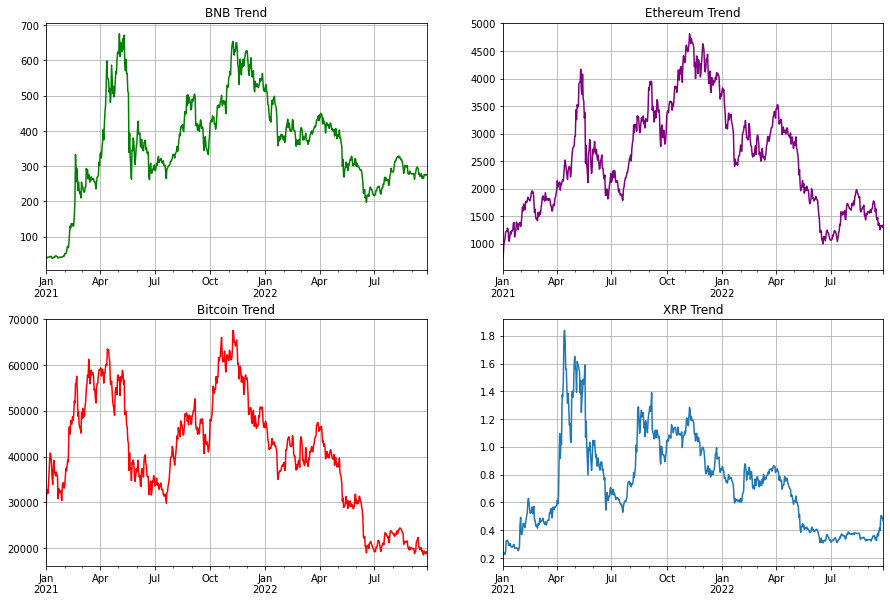

In [220]:
from matplotlib.pyplot import title
# Using line graphs and subploting to see the different trends for the Cryptocurrencies


plt.subplot(2, 2, 1)
bnb['Adj Close'].plot(grid=True, figsize=(15, 10), color = 'green', title= 'BNB Trend')
plt.xlabel(' ')
plt.subplot(2, 2, 3)
btc['Adj Close'].plot(grid=True, figsize=(15, 10), color = 'red', title= 'Bitcoin Trend')
plt.xlabel(' ')
plt.subplot(2, 2, 2)
eth['Adj Close'].plot(grid=True, figsize=(15, 10), color = 'purple', title= 'Ethereum Trend')
plt.xlabel(' ')
plt.subplot(2, 2, 4)
xrp['Adj Close'].plot(grid=True, figsize=(15, 10), title= 'XRP Trend')
plt.xlabel(' ')
plt.show


In [250]:
btc['Adj Close'].pct_change()

Date
2021-01-01         NaN
2021-01-02    0.093726
2021-01-03    0.020380
2021-01-04   -0.024712
2021-01-05    0.063197
                ...   
2022-09-22    0.046699
2022-09-23   -0.005971
2022-09-24   -0.018688
2022-09-25   -0.007124
2022-09-26    0.022368
Name: Adj Close, Length: 634, dtype: float64

In [251]:
eth['Adj Close'].pct_change()

Date
2021-01-01         NaN
2021-01-02    0.060473
2021-01-03    0.259475
2021-01-04    0.066350
2021-01-05    0.057461
                ...   
2022-09-22    0.059933
2022-09-23    0.000436
2022-09-24   -0.007729
2022-09-25   -0.018040
2022-09-26    0.031759
Name: Adj Close, Length: 634, dtype: float64

In [221]:
#BNB candlestick plot
fig = go.Figure(data=[go.Candlestick(x=bnb['Date'],
                open=bnb['Open'], high=bnb['High'],
                low=bnb['Low'], close=bnb['Close'])
                     ])


fig.show()

In [222]:
#Bitcoin candlestick plot


fig = go.Figure(data=[go.Candlestick(x=btc['Date'],
                open=btc['Open'], high=btc['High'],
                low=btc['Low'], close=btc['Close'])
                     ])


fig.show()

In [223]:
#Ehereum candlestick plot

fig = go.Figure(data=[go.Candlestick(x=eth['Date'],
                open=eth['Open'], high=eth['High'],
                low=eth['Low'], close=eth['Close'])
                     ])


fig.show()

In [224]:
#XRP candlestick plot

fig = go.Figure(data=[go.Candlestick(x=xrp['Date'],
                open=xrp['Open'], high=xrp['High'],
                low=xrp['Low'], close=xrp['Close'])
                     ])


fig.show()

In [225]:
#Bitcoin top 10 volume dates

btc.sort_values(['Volume'], ascending=False).head(10)

,Date,Crypto,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,
2021-02-26,2021-02-26,Bitcoin,46339.761719,46339.761719,48370.785156,44454.843750,47180.464844,350967941479
2021-05-19,2021-05-19,Bitcoin,37002.441406,37002.441406,43546.117188,30681.496094,42944.976562,126358098747
2021-01-11,2021-01-11,Bitcoin,35566.656250,35566.656250,38346.531250,30549.599609,38346.531250,123320567399
2021-01-29,2021-01-29,Bitcoin,34316.386719,34316.386719,38406.261719,32064.814453,34318.671875,117894572511
2021-02-23,2021-02-23,Bitcoin,48824.425781,48824.425781,54204.929688,45290.589844,54204.929688,106102492824
2021-02-08,2021-02-08,Bitcoin,46196.464844,46196.464844,46203.929688,38076.324219,38886.828125,101467222687
2021-04-18,2021-04-18,Bitcoin,56216.183594,56216.183594,61057.457031,52829.535156,60701.886719,97468872758
2021-05-13,2021-05-13,Bitcoin,49716.191406,49716.191406,51330.843750,46980.019531,49735.433594,96721152926
2021-02-22,2021-02-22,Bitcoin,54207.320312,54207.320312,57533.390625,48967.566406,57532.738281,92052420332


TypeError: 'Index' object is not callable

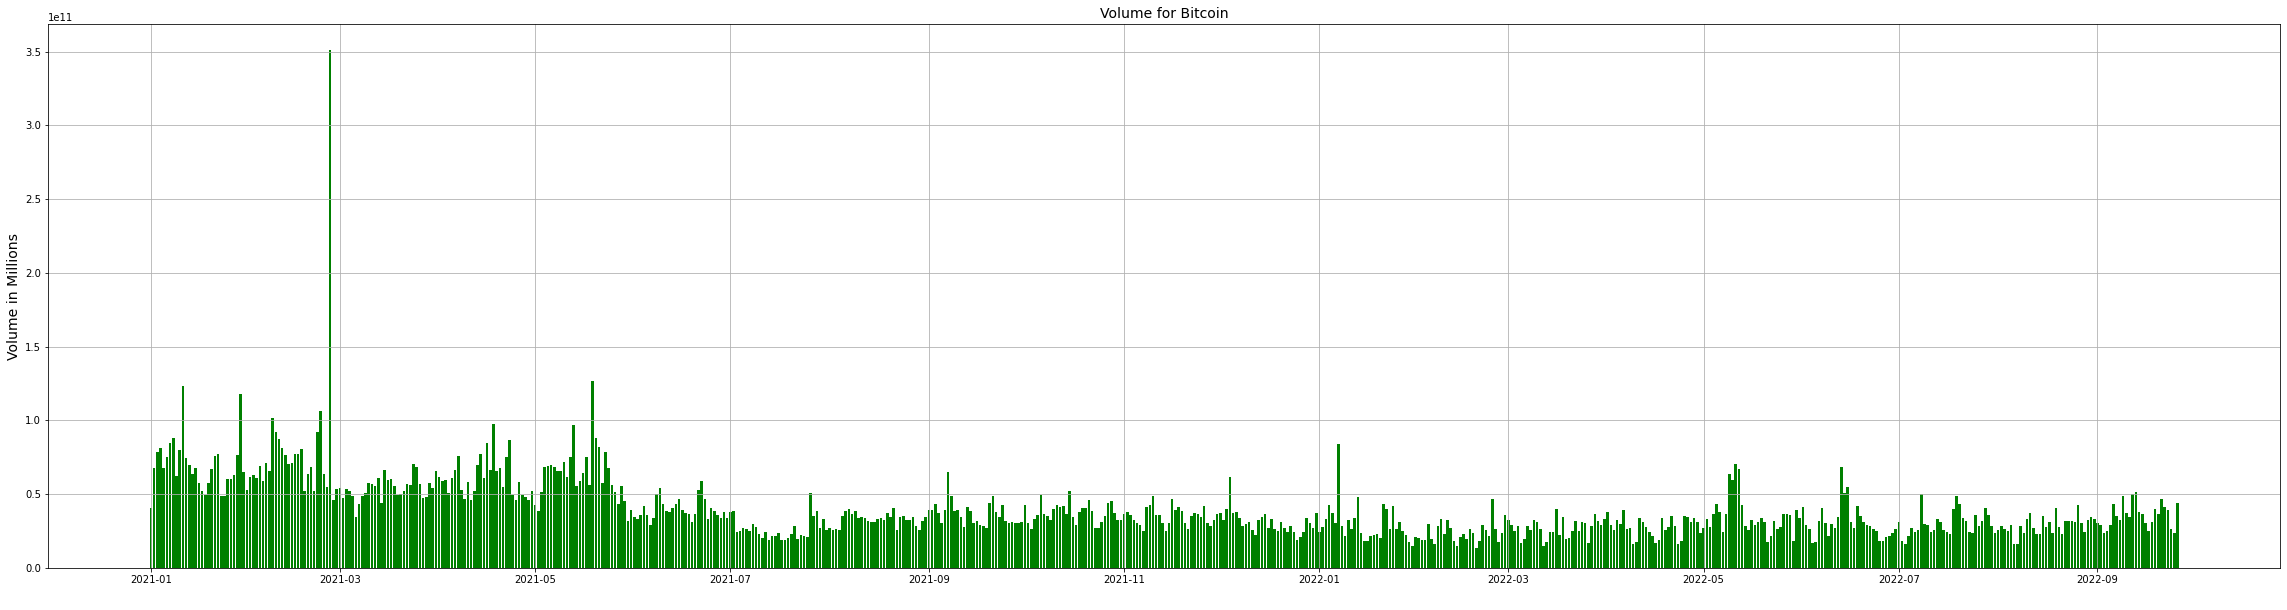

In [ ]:
plt.figure(figsize=(40,10))
plt.bar(btc['Date'], btc['Volume'], color='green')
plt.title('Volume for Bitcoin', fontsize=14)
plt.xlabel(' ', fontsize=14)
plt.ylabel('Volume in Millions', fontsize=14)
plt.grid(True)
plt.show()